In [1]:
#install opencv library
#pip install opencv-python

In [2]:
#include the relevant libraries
import numpy as np
import cv2 as cv
import glob
import os
import matplotlib.pyplot as plt

In [3]:
# Set path to protein images - Please change the path to the location of the folder named images on your system
path = "images/"

In [4]:
# Get all image names
imageNames = []
# Format is ['20_B5_1_green.jpg', ...]
[imageNames.append(filename) for filename in glob.glob(path+"*.jpg")]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [5]:
#test if the images are found
print(imageNames[0])

images/21_B5_2_green.jpg


In [6]:
# Print all the image names
print(imageNames)

['images/21_B5_2_green.jpg', 'images/20_B5_2_green.jpg', 'images/22_B5_1_green.jpg', 'images/21_B5_1_green.jpg', 'images/504_A4_1_green.jpg', 'images/506_A4_2_green.jpg', 'images/504_A4_3_green.jpg', 'images/555_A4_2_green.jpg', 'images/22_B5_2_green.jpg', 'images/555_A4_1_green.jpg', 'images/506_A4_3_green.jpg', 'images/20_B5_1_green.jpg']


In [7]:
# Create subfolders for images of type A and of type B
try:
    os.mkdir(path+'saved_images/')
    os.mkdir(path+'saved_images/A')
    os.mkdir(path+'saved_images/B')
except OSError as error:
    print(error)
#os.mkdir(path+'saved_images/')

In [8]:
# Loop over all images and segment proteins: please extend
for imageName in imageNames:
    imageProt = cv.imread(imageName)
    cv.destroyAllWindows()
    # Convert to grayscale
    imageProtGray = cv.cvtColor(imageProt, cv.COLOR_BGR2GRAY)
    # Treshold image to binary
    tresholdValue = 1.5 * np.mean(imageProtGray)
    ret, grayTresh = cv.threshold(imageProtGray, tresholdValue, 255,
                                  cv.THRESH_BINARY)
    ## Segment image
    filterSize = 3
    kernel = np.ones((filterSize,filterSize), np.uint8)
    # Operate closing to fill holes
    grayTreshMorph = grayTresh
    grayTreshMorph = cv.morphologyEx(grayTresh,
                                     cv.MORPH_CLOSE, kernel)

    # Get contours
    contours, hierarchy = cv.findContours(grayTreshMorph,
                                         cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # Get largest contours
    proteinContours = []
    # Loop over all contours
    for cnt in contours:
        area = cv.contourArea(cnt)
        # Discard small contours
        if area < 10000:
            continue
        # Add contour
        proteinContours.append(cnt)

    # Display number of protein contours found
    print("Number of protein contours found = " + str(len(proteinContours)))
    #generate image with zero background
    imageProt = np.zeros(imageProt.shape, np.uint8)
    #draw contours and fill the masks
    imageProt = cv.drawContours(imageProt, proteinContours, -1, (255,255,255), -1)
    # Loop over all protein contours to save each protein in 500x500 image
    
    
    proteinNr = 0
    for c in proteinContours:
        proteinNr += 1
        # Get center of contour
        M = cv.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        
        
        # Add black border to image
        padding = 250
        # Crop image for each protein found: 500x500x3 jpg
        imageProtPadded = cv.copyMakeBorder(imageProt, padding, padding,
                                            padding, padding,
                                            cv.BORDER_CONSTANT, value=[0, 0, 0])
       
        # Crop image
        imgSize = 500
        croppedImg = imageProtPadded[cY-int(imgSize/2)+padding:
                                     cY+int(imgSize/2)+padding,
                                     cX-int(imgSize/2)+padding:
                                     cX+int(imgSize/2)+padding]
        
        # Save cropped protein images
        imageNameFile = imageName.split('/')[-1]
        if imageName[-14] == 'A':
            print('Writing' + path + 'saved_images/A/' +
                       'prot' + str(proteinNr) + '_' +imageNameFile)
            cv.imwrite(path + 'saved_images/A/' +
                       'prot' + str(proteinNr) + '_' + imageNameFile, croppedImg)
        elif imageName[-14] == 'B':
            print(path + 'saved_images/B/' +
                       'prot' + str(proteinNr) + '_' + imageNameFile)
            cv.imwrite(path + 'saved_images/B/' +
                       'prot' + str(proteinNr) + '_' + imageNameFile, croppedImg)
        else:
            print('Could not determine class for image ', imageNameFile)
            continue



Number of protein contours found = 11
images/saved_images/B/prot1_21_B5_2_green.jpg
images/saved_images/B/prot2_21_B5_2_green.jpg
images/saved_images/B/prot3_21_B5_2_green.jpg
images/saved_images/B/prot4_21_B5_2_green.jpg
images/saved_images/B/prot5_21_B5_2_green.jpg
images/saved_images/B/prot6_21_B5_2_green.jpg
images/saved_images/B/prot7_21_B5_2_green.jpg
images/saved_images/B/prot8_21_B5_2_green.jpg
images/saved_images/B/prot9_21_B5_2_green.jpg
images/saved_images/B/prot10_21_B5_2_green.jpg
images/saved_images/B/prot11_21_B5_2_green.jpg
Number of protein contours found = 12
images/saved_images/B/prot1_20_B5_2_green.jpg
images/saved_images/B/prot2_20_B5_2_green.jpg
images/saved_images/B/prot3_20_B5_2_green.jpg
images/saved_images/B/prot4_20_B5_2_green.jpg
images/saved_images/B/prot5_20_B5_2_green.jpg
images/saved_images/B/prot6_20_B5_2_green.jpg
images/saved_images/B/prot7_20_B5_2_green.jpg
images/saved_images/B/prot8_20_B5_2_green.jpg
images/saved_images/B/prot9_20_B5_2_green.jpg
im

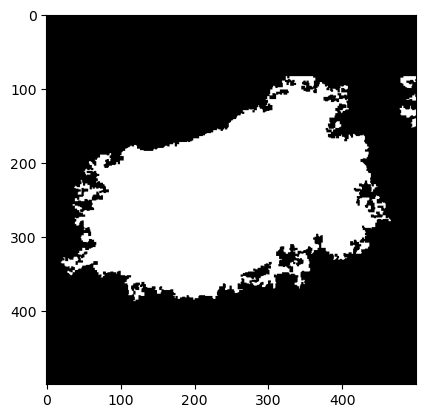

In [9]:
plt.imshow(croppedImg)